# **Credit Card Fraud Detection**

**Dataset:** Credit Card Fraud Detection dataset available at https://www.kaggle.com/mlg-ulb/creditcardfraud
Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) 

**Code:** Oversampling from TensorFlow tutorials - https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [1]:
# Common imports
import numpy as np
import os

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Get the data

Predict if a transaction is a fraud: `Class` = 1

### Dataset attributes:

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
<BR>Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
<BR>The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
<BR>Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [2]:
CREDIT_FRAUD_PATH = "dataset"

def load_credit_fraud_data(credit_fraud_path=CREDIT_FRAUD_PATH):
    csv_path = os.path.join(credit_fraud_path, "creditcard.csv")
    return pd.read_csv(csv_path)

In [3]:
credit_fraud = load_credit_fraud_data()
credit_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_fraud["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
credit_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data visualization

In [7]:
corr_matrix = credit_fraud.corr()

In [8]:
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

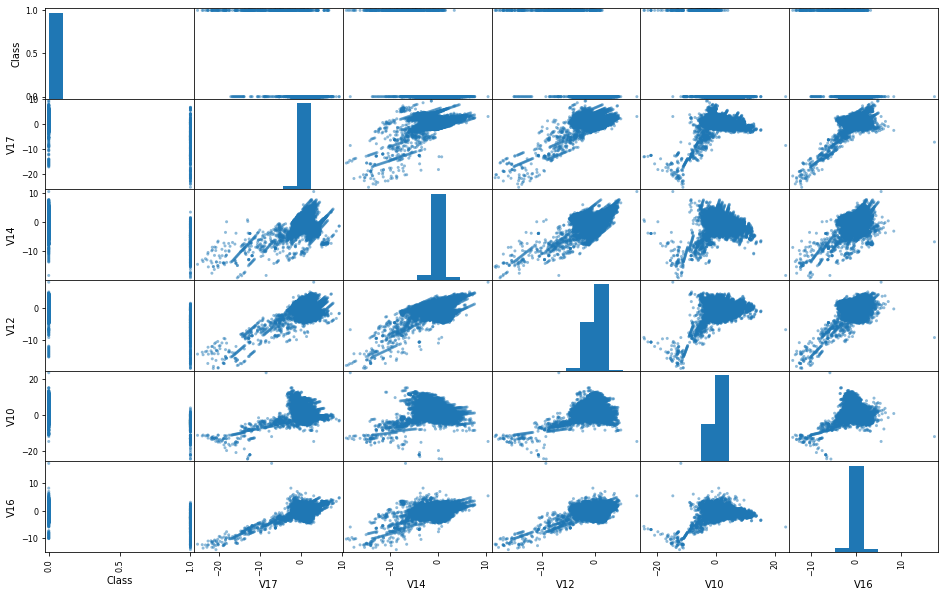

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["Class", "V17", "V14", "V12", "V10", "V16"]
scatter_matrix(credit_fraud[attributes], figsize=(16, 10))
plt.show()

In [10]:
no_fraud, fraud = np.bincount(credit_fraud["Class"])

In [11]:
X_no_fraud = pd.DataFrame(credit_fraud, columns=credit_fraud.columns, 
                             index=credit_fraud.index[(credit_fraud["Class"] == 0)])

In [12]:
X_fraud = pd.DataFrame(credit_fraud, columns=credit_fraud.columns, 
                             index=credit_fraud.index[(credit_fraud["Class"] == 1)])

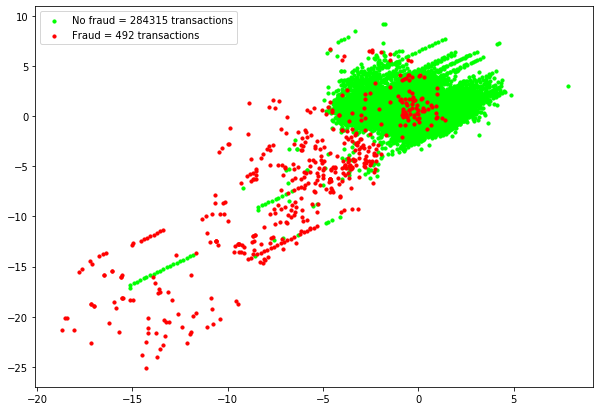

In [13]:
plt.figure(figsize=(10, 7))

plt.scatter(X_no_fraud["V12"], X_no_fraud["V17"], color='lime', s=10, label="No fraud = " + 
            str(no_fraud) + " transactions")
plt.scatter(X_fraud["V12"], X_fraud["V17"], color='red', s=10, label="Fraud = " + 
            str(fraud) + " transactions")
plt.legend(loc="upper left")

plt.show()

**The fraud transactions spread is much wider**, even if fraud transactions represent only 0.173% of the total number of transactions!

## Data preparation

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(credit_fraud, test_size=0.2, random_state=42)

In [15]:
X_train = train_set.drop("Class", axis=1) # drop labels for training set
y_train = train_set["Class"].copy()

In [16]:
X_test = test_set.drop("Class", axis=1) # drop labels for training set
y_test = test_set["Class"].copy()

Shuffle the training data:

In [17]:
shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

Expecting no incomplete rows, and **no imputation** later in the pipeline:

In [18]:
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount


## Ordinary Classification

In [19]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# to supress the warning "ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.",
#     which appears even if number of iterations is increased from 1,000 to 10,000
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

lin_svm_clf = Pipeline((
    ('std_scaler', StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
    ))

lin_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(lin_svm_clf, X_train, y_train, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train, y_train_predict)

array([[227392,     59],
       [    82,    312]], dtype=int64)

In [23]:
def performance_scores(y, y_predict):
    print("Precision score:\t", precision_score(y, y_predict))
    print("Recall score:\t\t", recall_score(y, y_predict))   
    print("F1 score:\t\t", f1_score(y, y_predict))   
    return

In [24]:
performance_scores(y_train, y_train_predict)

Precision score:	 0.8409703504043127
Recall score:		 0.7918781725888325
F1 score:		 0.8156862745098039


In [25]:
y_test_predict = lin_svm_clf.predict(X_test)

In [26]:
confusion_matrix(y_test, y_test_predict)

array([[56851,    13],
       [   26,    72]], dtype=int64)

In [27]:
performance_scores(y_test, y_test_predict)

Precision score:	 0.8470588235294118
Recall score:		 0.7346938775510204
F1 score:		 0.7868852459016393


## Classifier with class weights

The “balanced” mode adjusts the class weights to be proportional with the number of samples for each class

In [28]:
lin_svm_w_clf = Pipeline((
    ('std_scaler', StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", class_weight="balanced", random_state=42))
    ))

lin_svm_w_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight='balanced', dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [29]:
y_train_w_predict = cross_val_predict(lin_svm_w_clf, X_train, y_train, cv=3)

In [30]:
confusion_matrix(y_train, y_train_w_predict)

array([[227383,     68],
       [    80,    314]], dtype=int64)

In [31]:
performance_scores(y_train, y_train_w_predict)

Precision score:	 0.8219895287958116
Recall score:		 0.7969543147208121
F1 score:		 0.8092783505154638


We want minimum of false negative, so maximum recall. With the weighted classes, the recall is only slightly better.

In [32]:
y_test_predict = lin_svm_w_clf.predict(X_test)

In [33]:
confusion_matrix(y_test, y_test_predict)

array([[56845,    19],
       [   20,    78]], dtype=int64)

In [34]:
performance_scores(y_test, y_test_predict)

Precision score:	 0.8041237113402062
Recall score:		 0.7959183673469388
F1 score:		 0.8


## Oversampling the fraud class

**Balance the dataset** by randomly chosing fraud transactions, to have equal number of samples from each class:

In [35]:
y_fraud_index = y_train.to_numpy() != 0

In [36]:
X_train_fraud = X_train[y_fraud_index]
X_train_no_fraud = X_train[~y_fraud_index]

y_train_fraud = y_train[y_fraud_index]
y_train_no_fraud = y_train[~y_fraud_index]

In [37]:
choices = np.random.choice(X_train_fraud.index.to_numpy(), len(X_train_no_fraud))

In [38]:
X_train_fraud_resampled = X_train_fraud.loc[choices]
y_train_fraud_resampled = y_train_fraud.loc[choices]

In [39]:
X_train_resampled = np.concatenate([X_train_fraud_resampled, X_train_no_fraud], axis=0)
y_train_resampled = np.concatenate([y_train_fraud_resampled, y_train_no_fraud], axis=0)

order = np.arange(len(y_train_resampled))
np.random.shuffle(order)
X_train_resampled = X_train_resampled[order]
y_train_resampled = y_train_resampled[order]

In [40]:
resampled_no_fraud, resampled_fraud = np.bincount(y_train_resampled)
print("No fraud samples:", resampled_no_fraud, "\tFraud samples:", resampled_fraud)

No fraud samples: 227451 	Fraud samples: 227451


In [41]:
lin_svm_resampled_clf = Pipeline((
    ('std_scaler', StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
    ))

lin_svm_resampled_clf.fit(X_train_resampled, y_train_resampled)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [42]:
y_test_predict = lin_svm_resampled_clf.predict(X_test)

In [43]:
confusion_matrix(y_test, y_test_predict)

array([[55709,  1155],
       [    8,    90]], dtype=int64)

In [44]:
performance_scores(y_test, y_test_predict)

Precision score:	 0.07228915662650602
Recall score:		 0.9183673469387755
F1 score:		 0.1340282948622487


The **recall is now much better**. Even if there are lot of false positive (1165), the model detects most of the fraud transactions (**90 out of 98**).

**Cannot use the imblearn package**, as it needs sklearn 0.23 which is not yet available on Anacoda environment:

In [45]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X_train, y_train)